In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("C:\MS IIIT\Deep Learning\Skin cancer ISIC The International Skin Imaging Collaboration\Train")
data_dir_test = pathlib.Path('C:\MS IIIT\Deep Learning\Skin cancer ISIC The International Skin Imaging Collaboration\Test')

In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [4]:
##Load using keras.preprocessing
#Let's load these images off disk using the helpful image_dataset_from_directory utility.

In [5]:
##Create a dataset
#Define some parameters for the loader:
batch_size = 32
img_height = 180
img_width = 180

In [6]:
#Use 80% of the images for training, and 20% for validation.


##Wrinting Train dataset & creating the dataset using tf.keras.preprocessing.image_dataset_from_directory
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
#Writing validation dataset 

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)


Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# We can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


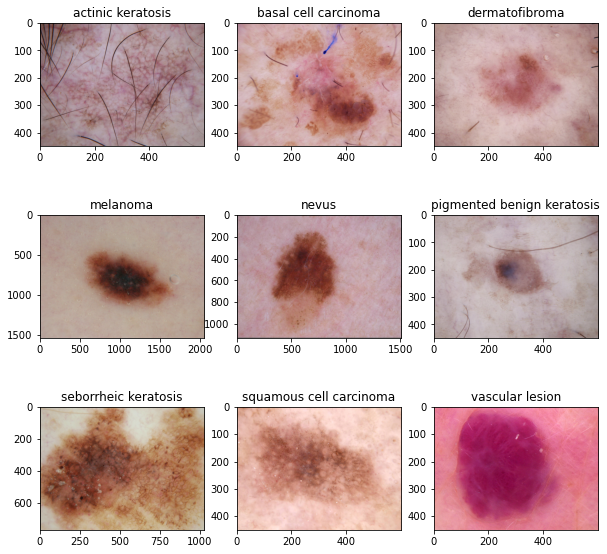

In [9]:
## Visualisation of Data
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

In [10]:
## The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
##Model Creatrion
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

In [12]:
##Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
## # View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

In [18]:
##Train the model

epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
56/56 [==============================] - 456s 8s/step - loss: 2.0240 - accuracy: 0.2015 - val_loss: 1.9770 - val_accuracy: 0.2528
Epoch 2/30
56/56 [==============================] - 417s 7s/step - loss: 1.9992 - accuracy: 0.2277 - val_loss: 2.0382 - val_accuracy: 0.2058
Epoch 3/30
56/56 [==============================] - 425s 8s/step - loss: 2.0189 - accuracy: 0.2054 - val_loss: 2.0107 - val_accuracy: 0.2260
Epoch 4/30
56/56 [==============================] - 418s 7s/step - loss: 2.0003 - accuracy: 0.2388 - val_loss: 2.0163 - val_accuracy: 0.2125
Epoch 5/30
56/56 [==============================] - 424s 8s/step - loss: 1.9927 - accuracy: 0.2383 - val_loss: 1.9639 - val_accuracy: 0.2349
Epoch 6/30
56/56 [==============================] - 379s 7s/step - loss: 1.9395 - accuracy: 0.2684 - val_loss: 1.8587 - val_accuracy: 0.3423
Epoch 7/30
56/56 [==============================] - 323s 6s/step - loss: 2.1050 - accuracy: 0.2260 - val_loss: 2.0277 - val_accuracy: 0.2058
Epoch 8/30
56

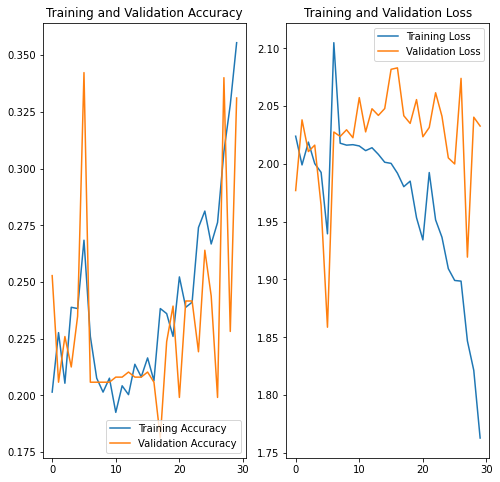

In [19]:
##Visualizing training results

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
## Findings after the model fit (Model overfit and underfit check)
## Finding on the first base model

#The model is overfitting because we can also see difference in loss functions in training & test around the 10-11th epoch

#The accuracy is just around 75-80% because there are enough features to remember the pattern.



In [21]:
# after analysing the model fit history for presence of underfit or overfit, the appropriate data augumentation strategy. 

data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

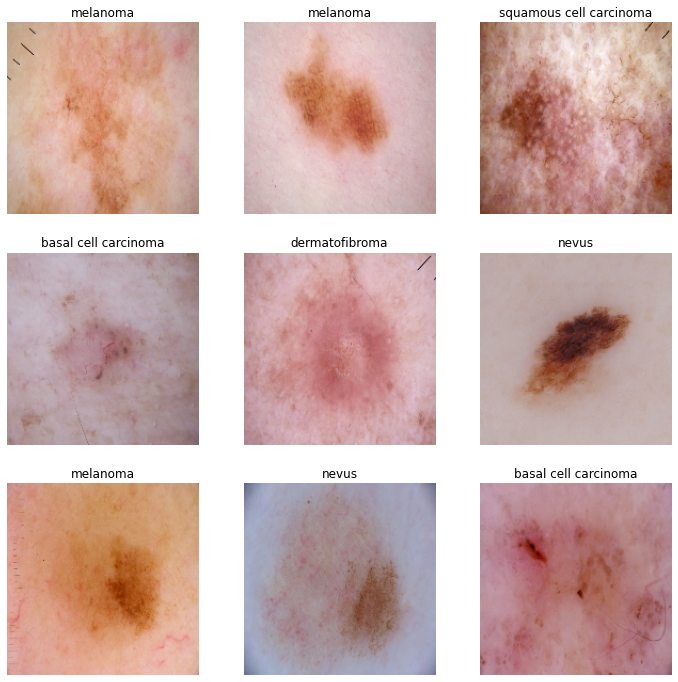

In [23]:
# visualization of augmentation strategy works for one instance of training image.

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [29]:
## model creation , compile and train the model
# Dropout layer if there is an evidence of overfitting in the findings

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))


In [28]:
## Compiling the code

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

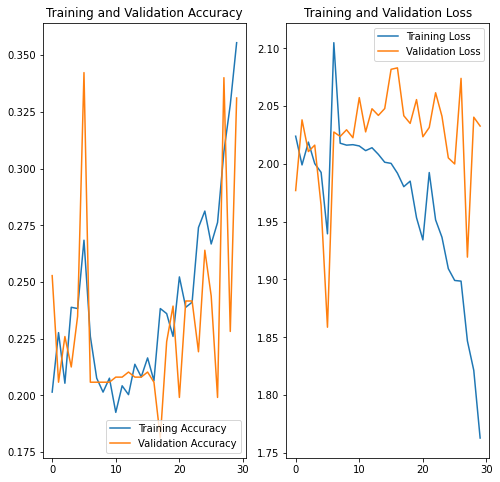

In [32]:
## Visualisuing the results 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [33]:
## Finding from Second Model
# 1. There is no improvement in accuracy but we can definitely see the overfitting problem has solved due to data augmentation

# 2. We can increase the epochs to increase the accuracy so it's too early for judgement


## Distribution of classes in the training dataset.

path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,C:\MS IIIT\Deep Learning\Skin cancer ISIC The ...,actinic keratosis
1,C:\MS IIIT\Deep Learning\Skin cancer ISIC The ...,actinic keratosis
2,C:\MS IIIT\Deep Learning\Skin cancer ISIC The ...,actinic keratosis
3,C:\MS IIIT\Deep Learning\Skin cancer ISIC The ...,actinic keratosis
4,C:\MS IIIT\Deep Learning\Skin cancer ISIC The ...,actinic keratosis
...,...,...
2234,C:\MS IIIT\Deep Learning\Skin cancer ISIC The ...,vascular lesion
2235,C:\MS IIIT\Deep Learning\Skin cancer ISIC The ...,vascular lesion
2236,C:\MS IIIT\Deep Learning\Skin cancer ISIC The ...,vascular lesion
2237,C:\MS IIIT\Deep Learning\Skin cancer ISIC The ...,vascular lesion


In [34]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,C:\MS IIIT\Deep Learning\Skin cancer ISIC The ...,actinic keratosis
1,C:\MS IIIT\Deep Learning\Skin cancer ISIC The ...,actinic keratosis
2,C:\MS IIIT\Deep Learning\Skin cancer ISIC The ...,actinic keratosis
3,C:\MS IIIT\Deep Learning\Skin cancer ISIC The ...,actinic keratosis
4,C:\MS IIIT\Deep Learning\Skin cancer ISIC The ...,actinic keratosis
...,...,...
2234,C:\MS IIIT\Deep Learning\Skin cancer ISIC The ...,vascular lesion
2235,C:\MS IIIT\Deep Learning\Skin cancer ISIC The ...,vascular lesion
2236,C:\MS IIIT\Deep Learning\Skin cancer ISIC The ...,vascular lesion
2237,C:\MS IIIT\Deep Learning\Skin cancer ISIC The ...,vascular lesion


<BarContainer object of 9 artists>

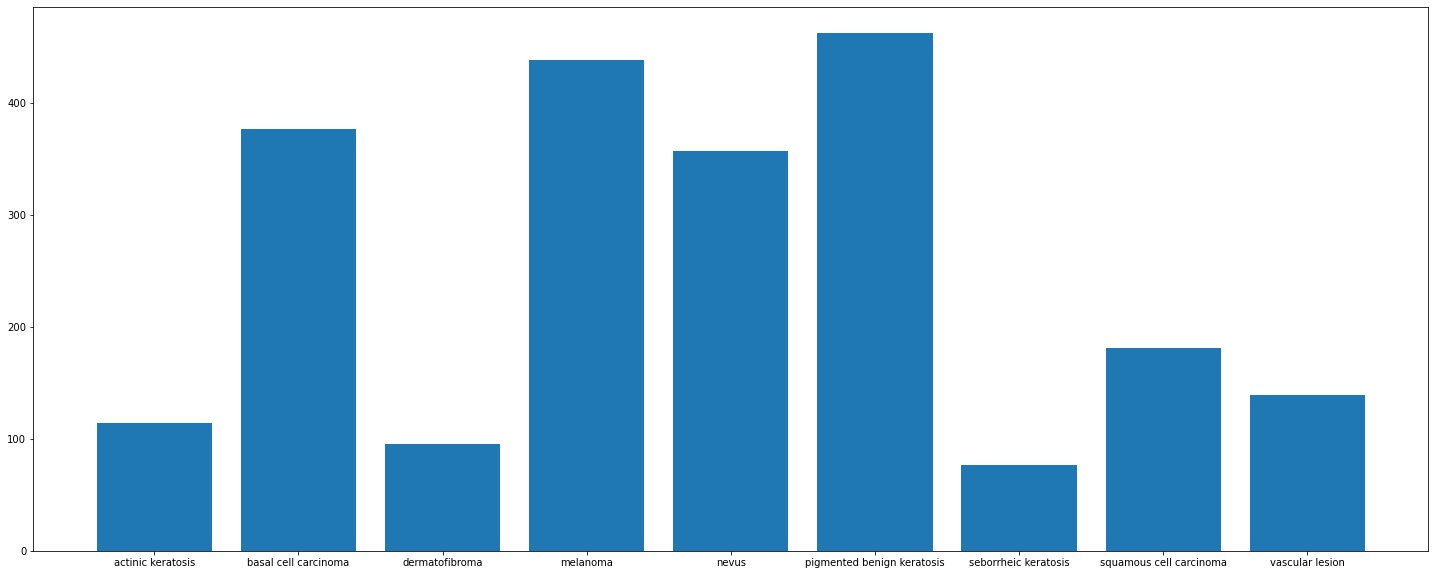

In [35]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

In [36]:
## Findings 
# 1. squamous cell carcinoma has least number of samples
# 2. actinic keratosis and dermatofibroma have proportionate number of classes. melanoma and pigmented benign keratosis have proprtionate number of classes
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [37]:
)

IndentationError: unexpected indent (Temp/ipykernel_13376/430082940.py, line 2)